# Mate Pocs working notebook for Project 1

In [126]:
# importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# creating dataframe by loading from .csv file
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


STEP 1 : DATA CLEANING

In [128]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [129]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


id: we can ignore

date: date field, not in correct format, needs to be converted

price, bedrooms, bathrooms, sqft_living, sqft_lot, floors: integers / floats, continuous
sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15: same

lat and long: special, need to create new column for it to be meaningful

zipcode: in integer format, but need to be careful with it

waterfront, viewed: yeas / no

condition, grade: ordinal grades


# starting with the date field




In [131]:
data['date'].value_counts()[0:20]

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/14/2015     121
4/22/2015     121
4/28/2015     121
7/9/2014      121
4/21/2015     119
6/24/2014     119
8/26/2014     117
10/28/2014    117
5/20/2014     116
7/14/2014     116
7/1/2014      115
8/20/2014     114
6/17/2014     113
4/29/2015     113
Name: date, dtype: int64

In [132]:
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y')

In [133]:
data['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [134]:
print(data['date'].max(), data['date'].min())

2015-05-27 00:00:00 2014-05-02 00:00:00


date fields are valid dates between 2014-05-02 and 2015-05-27

**************
checking lat and long
**************

In [135]:
data[['lat', 'long']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 2 columns):
lat     21597 non-null float64
long    21597 non-null float64
dtypes: float64(2)
memory usage: 337.6 KB


In [136]:
data[['lat', 'long']].describe()


,lat,long
count,21597.000000,21597.000000
mean,47.560093,-122.213982
std,0.138552,0.140724
min,47.155900,-122.519000
25%,47.471100,-122.328000
50%,47.571800,-122.231000
75%,47.678000,-122.125000
max,47.777600,-121.315000


all very close, seems to be valid, no need to adjust

**************
cleaning zipcode
**************

In [137]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

****
checking waterfront
*****

In [138]:
# this variable has some missing values
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [139]:
data[data['waterfront'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,2014-07-15,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,2014-05-12,885000.0,4,2.50,2830,5000,2.0,NaN,0.0,...,9,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,2014-10-17,350000.0,4,2.75,2500,5995,2.0,NaN,0.0,...,8,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,2014-10-13,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,...,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,2014-06-26,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,...,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [140]:
# no obvious trend for missing waterfront rows 
# splitting data into two subsets based on existing waterfront indicators

data_waterfront = data[data['waterfront'] == 1]
data_nonwaterfront = data[data['waterfront'] == 0]

In [141]:
(data['price']/1000).describe()

count    21597.000000
mean       540.296574
std        367.368140
min         78.000000
25%        322.000000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

In [142]:
(data_waterfront['price']/1000).describe()

count     146.000000
mean     1717.214726
std      1145.384857
min       285.000000
25%       827.500000
50%      1510.000000
75%      2282.500000
max      7060.000000
Name: price, dtype: float64

In [143]:
# that is very weird, huge difference
# maybe should have started with examining price

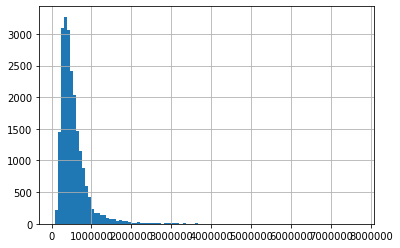

In [144]:
data['price'].hist(bins = 100)

In [145]:
data['price'].max()

7700000.0

In [146]:
data[data['price'] == data['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [147]:
# it actually looks legit
# unfortunately, waterfront seems to be an important factor in general
# for now, i recommend not doing anything with the missing waterfronts, maybe we can create a separate df 

In [148]:
data[data['price'] == data['price'].min()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,2014-05-06,78000.0,2,1.0,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.28,1700,10387


In [149]:
# as far as i can tell, price looks OK too

****
checking view
*****

In [150]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [151]:
data[data['view'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,2014-10-28,480000.0,4,2.50,3230,16171,2.0,0.0,NaN,...,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,2015-04-06,430000.0,4,2.50,2070,4310,2.0,0.0,NaN,...,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,2014-08-04,840000.0,4,1.75,2480,11010,1.0,0.0,NaN,...,9,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,2014-07-21,207950.0,2,2.00,890,5000,1.0,0.0,NaN,...,6,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,2014-05-28,1400000.0,4,3.25,4700,9160,1.0,0.0,NaN,...,11,2520,2180.0,2005,0.0,98116,47.5744,-122.406,2240,8700
20148,291310170,2014-08-04,384500.0,3,2.50,1600,2610,2.0,0.0,NaN,...,8,1600,0.0,2005,NaN,98027,47.5344,-122.068,1445,1288
20380,1196003740,2014-09-24,734000.0,5,4.25,4110,42755,2.0,0.0,NaN,...,10,2970,1140.0,2000,NaN,98023,47.3375,-122.337,2730,12750
21057,3448900290,2014-08-28,636230.0,4,2.50,2840,6284,2.0,0.0,NaN,...,9,2840,0.0,2013,0.0,98056,47.5135,-122.169,2790,7168


In [152]:
# the yr_renovated is missing from these lines as well, weird coincidence
# the non-missing values are OK

****
checking condition and grade
*****

In [153]:
data['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [154]:
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [155]:
# condition looks legit, grades are a bit weird, because grade 1 is supposed to be a shed

data[data['grade']< 5][['condition', 'grade', 'price']]

,condition,grade,price
350,3,4,299000.0
465,2,4,80000.0
1065,4,4,140000.0
3220,5,3,262000.0
3578,4,4,355000.0
3881,4,4,248000.0
5199,4,4,352000.0
6474,3,4,217000.0
7966,2,4,120000.0
8588,3,4,205000.0


In [156]:
data[data['grade']< 5].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,26.0,28.000000,28.000000,28.000000,28.000000,28.000000,19.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,4.275682e+09,213787.500000,1.571429,0.901786,675.000000,15520.714286,1.035714,0.0,0.142857,3.214286,3.964286,667.857143,1935.678571,104.210526,98066.964286,47.485886,-122.159071,1481.428571,12872.928571
std,2.297286e+09,95942.158139,0.572750,0.207936,222.602452,14936.150498,0.131133,0.0,0.448395,0.875897,0.188982,223.314380,15.869966,454.243153,54.994601,0.119449,0.166132,504.239172,10348.780118
min,7.450000e+08,80000.000000,1.000000,0.750000,410.000000,1500.000000,1.000000,0.0,0.000000,1.000000,3.000000,410.000000,1900.000000,0.000000,98010.000000,47.208200,-122.391000,850.000000,4120.000000
25%,2.294400e+09,143750.000000,1.000000,0.750000,520.000000,5192.500000,1.000000,0.0,0.000000,3.000000,4.000000,520.000000,1923.000000,0.000000,98026.250000,47.388175,-122.326250,1160.000000,6720.000000
50%,3.712500e+09,202500.000000,2.000000,0.875000,680.000000,9193.000000,1.000000,0.0,0.000000,3.000000,4.000000,630.000000,1939.500000,0.000000,98055.000000,47.493000,-122.164500,1380.000000,9115.000000
75%,6.340875e+09,271250.000000,2.000000,1.000000,762.500000,17343.500000,1.000000,0.0,0.000000,4.000000,4.000000,762.500000,1947.250000,0.000000,98106.000000,47.534500,-122.036000,1632.500000,14343.250000
max,8.658300e+09,435000.000000,3.000000,1.750000,1470.000000,55764.000000,1.500000,0.0,2.000000,5.000000,4.000000,1470.000000,1967.000000,1980.000000,98198.000000,47.698500,-121.854000,3020.000000,43301.000000


In [157]:
#28 such rows, we might want to exclude these from model, but they don't look wrong, no need to clean up the data

remaining variables: 
bedrooms, bathrooms, sqft_living, sqft_lot, floors
sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15

****
checking yr_built and yr_renovated
*****

In [158]:
data['yr_built'].value_counts().head()

2014    559
2006    453
2005    450
2004    433
2003    420
Name: yr_built, dtype: int64

In [159]:
data['yr_built'].value_counts().tail()

1933    30
1901    29
1902    27
1935    24
1934    21
Name: yr_built, dtype: int64

In [160]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [161]:
# minimum is 1900, makes me wonder if that's just a default input

data[data['yr_built'] == 1900]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,...,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
115,3626039325,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,?,1900,NaN,98117,47.6981,-122.368,1830,6350
498,9274202270,2014-08-18,625000.0,2,1.50,1490,5750,1.5,0.0,0.0,...,7,1190,300.0,1900,0.0,98116,47.5872,-122.390,1590,4025
537,5694500105,2014-12-04,595000.0,2,2.00,1510,4000,1.0,0.0,0.0,...,7,1010,500.0,1900,0.0,98103,47.6582,-122.345,1920,4000
703,7011200260,2014-12-19,485000.0,4,2.00,1400,3600,1.0,0.0,0.0,...,7,1100,300.0,1900,0.0,98119,47.6385,-122.370,1630,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19048,1702901340,2014-06-13,718500.0,3,2.00,2910,6600,2.0,0.0,0.0,...,7,1920,990.0,1900,NaN,98118,47.5576,-122.281,1370,5500
19122,3388110230,2014-07-29,179000.0,4,1.75,1790,7175,1.5,0.0,0.0,...,6,1410,380.0,1900,NaN,98168,47.4963,-122.318,1790,8417
19304,4083302225,2014-10-14,850000.0,4,3.00,2550,3784,1.5,0.0,0.0,...,8,1750,800.0,1900,0.0,98103,47.6559,-122.338,2100,4560
19370,2420069042,2015-04-24,240000.0,3,2.00,1553,6550,1.0,NaN,0.0,...,7,1553,0.0,1900,NaN,98022,47.2056,-121.994,1010,10546


In [162]:
# looks OK I guess, let's check bottom 5
oldest_builds = data[data['yr_built'] < 1905]
oldest_builds['yr_built'].value_counts()

1900    87
1903    46
1904    45
1901    29
1902    27
Name: yr_built, dtype: int64

In [163]:
# suspicious, but cant do much about it, going to leave it as it is


In [164]:
data['yr_renovated'].value_counts(dropna = False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [165]:
data['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [166]:
# we just can't use this variable, need to drop from the dataframe
data_filtered = data.drop(columns = ['yr_renovated'], axis = 1)
data_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


remaining: bedrooms, bathrooms, sqft_living, sqft_lot, floors,  sqft_above, sqft_basement,sqft_living15, sqft_lot15

In [167]:
# let's do the sqft variables

sqft_variables = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

In [168]:
data_filtered[sqft_variables].describe()

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,2080.321850,1.509941e+04,1788.596842,1986.620318,12758.283512
std,918.106125,4.141264e+04,827.759761,685.230472,27274.441950
min,370.000000,5.200000e+02,370.000000,399.000000,651.000000
25%,1430.000000,5.040000e+03,1190.000000,1490.000000,5100.000000
50%,1910.000000,7.618000e+03,1560.000000,1840.000000,7620.000000
75%,2550.000000,1.068500e+04,2210.000000,2360.000000,10083.000000
max,13540.000000,1.651359e+06,9410.000000,6210.000000,871200.000000


In [169]:
for item in sqft_variables:
    print(data_filtered[item].value_counts(dropna=False))



1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64
5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64
1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1275.0        1
172.0         1
1930.0        1
1008.0        1
20.0          1
Name: sqft_basement, Length: 304, dtype: int64
1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64
5000      427
4000      356
6000      288
7200 

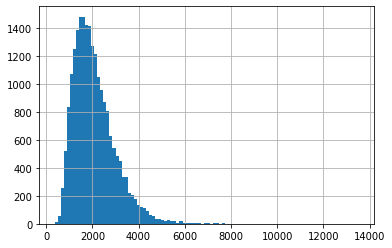

In [170]:
data_filtered[sqft_variables[0]].hist( bins = 100)

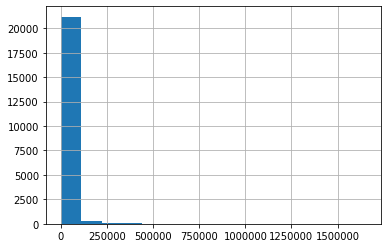

In [171]:
data_filtered[sqft_variables[1]].hist( bins = 15)

In [172]:
data_filtered[sqft_variables[1]].max()

1651359

In [173]:
# this does not necessarily look incorrect, but i think we should drop the top 5% of the lot sqft from the data
sqft_lot_cutoff_point = data_filtered[sqft_variables[1]].quantile(0.95)

In [174]:
data_filtered_2 = data_filtered[data_filtered[sqft_variables[1]]> sqft_lot_cutoff_point]

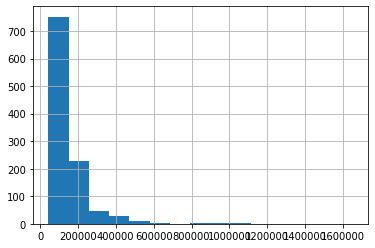

In [175]:
data_filtered_2[sqft_variables[1]].hist( bins = 15)

In [176]:
to_plot = data_filtered[sqft_variables[1]]
to_plot.sort_values(ascending = True).reset_index(drop = True)

0            520
1            572
2            600
3            609
4            635
          ...   
21592     982998
21593    1024068
21594    1074218
21595    1164794
21596    1651359
Name: sqft_lot, Length: 21597, dtype: int64

In [177]:
type(to_plot)

pandas.core.series.Series

In [178]:
to_plot[1]

7242

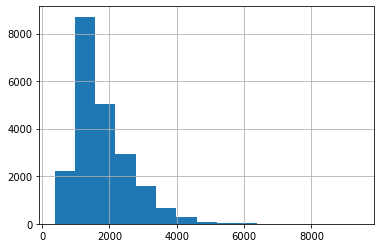

In [179]:
data_filtered[sqft_variables[2]].hist( bins = 15)

In [180]:
# sqft basement has missing values, type is not integer
data_filtered[data_filtered['sqft_basement'].isnull()]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


In [181]:
# so apparently there are no NaN values, they are just coded as string
# convert to float: 

data_filtered['sqft_basement_float'] = data_filtered['sqft_basement'].apply(float)
data_filtered.head()

ValueError: could not convert string to float: '?'

In [182]:
# apparently, there are ? items in the column
data_filtered[data_filtered['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,98003,47.3097,-122.327,2238,6819
18,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,7,1200,?,1921,98002,47.3089,-122.210,1060,5095
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,?,2014,98053,47.6848,-122.016,3625,5639
79,1531000030,2015-03-23,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,10,3450,?,2002,98010,47.3420,-122.025,3350,39750
112,2525310310,2014-09-16,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,7,1160,?,1980,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,3,7,1390,?,2008,98103,47.6931,-122.330,2180,5009
21447,1760650900,2014-07-21,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,3,7,2330,?,2013,98042,47.3590,-122.081,2300,3836
21473,6021503707,2015-01-20,352500.0,2,2.50,980,1010,3.0,NaN,0.0,3,8,980,?,2008,98117,47.6844,-122.387,980,1023
21519,2909310100,2014-10-15,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,3,7,2380,?,2010,98023,47.2815,-122.356,2380,5396


In [183]:
data_filtered['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [184]:
# let's see if we should drop with a scatter plot

data_filtered_3 = data_filtered.copy()
data_filtered_3 = data_filtered_3[data_filtered_3['sqft_basement'] != '?']
data_filtered_3.describe()
data_filtered_3['sqft_basement_float']=data_filtered_3['sqft_basement'].apply(float)

In [185]:
data_filtered_3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_float
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,400.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,910.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0.0


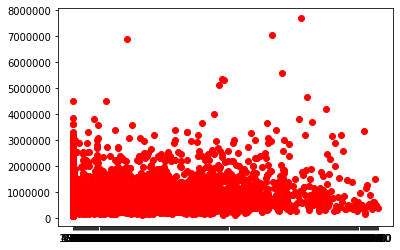

In [186]:
plt.scatter(y=data_filtered_3['price'], x=data_filtered_3['sqft_basement'], c='r')


In [187]:
# there is not a good amount of value, i wouldn't drop values / recode for this

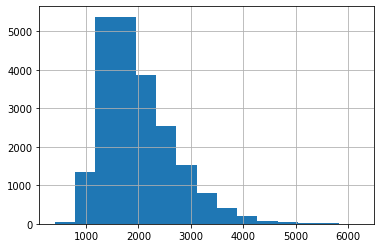

In [188]:
data_filtered[sqft_variables[4]].hist( bins = 15)

In [189]:
sqft_variables[4]

'sqft_living15'

In [190]:
data_filtered['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

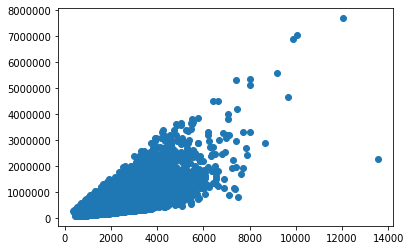

In [191]:
plt.scatter(x = data_filtered['sqft_living'], y = data_filtered['price'])

In [192]:
# definitely heteroscedastic

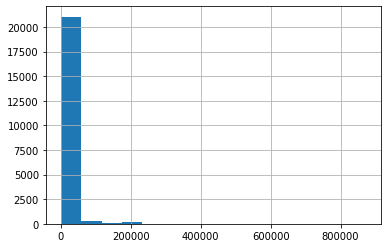

In [193]:
data_filtered[sqft_variables[5]].hist( bins = 15)

In [194]:
#lots of outliers here
sqft_variables[5]

'sqft_lot15'

In [195]:
cutoff_value = data_filtered['sqft_lot15'].quantile(0.95)

In [196]:
data_filtered4 = data_filtered[data_filtered['sqft_lot15']<cutoff_value]

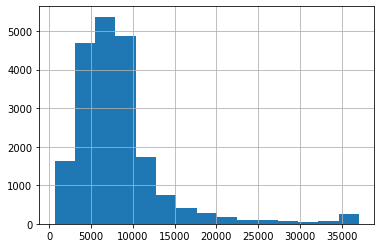

In [197]:
data_filtered4['sqft_lot15'].hist(bins = 15)

In [198]:
#bit of an increase at the end, maybe should cut off at 10%, but it seems excessive

ok, remaining variables: bedrooms, bathrooms, floors

In [199]:
data_filtered['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [200]:
# now I'm not sure, it could be a hotel...
data_filtered['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [201]:
data_filtered[data_filtered['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [202]:
# that is definitely a mistake, drop this from the data

# should create a list of filter conditions and keep appending to them and then drop them at the same time, i think that woukd be elegant


In [203]:
data_filtered[data_filtered['bedrooms'] > 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,2014-06-20,1950000.0,7,3.50,4640,15235,2.0,NaN,1.0,3,11,2860,1780.0,1965,98040,47.5666,-122.231,3230,20697
1134,4024100951,2015-01-05,420000.0,7,3.00,2940,8624,1.0,0.0,0.0,3,8,1690,1250.0,1977,98155,47.7555,-122.307,1850,8031
1239,7227802030,2014-06-23,350000.0,7,3.00,2800,9569,1.0,0.0,2.0,3,7,1400,1400.0,1963,98056,47.5102,-122.183,2150,7333
1658,9126101740,2014-12-04,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,3,8,1880,920.0,1997,98122,47.6086,-122.303,1800,2580
3717,5451100490,2015-01-15,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,3,8,5370,0.0,1967,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18808,4040500100,2014-10-20,539000.0,7,2.25,2620,6890,2.0,0.0,0.0,4,7,2620,0.0,1961,98007,47.6123,-122.134,2070,7910
18960,1778360150,2014-06-20,1240000.0,7,5.50,6630,13782,2.0,0.0,0.0,3,10,4930,1700.0,2004,98006,47.5399,-122.118,4470,8639
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,98105,47.6635,-122.320,1810,3745
19287,3756900027,2014-11-25,575000.0,8,3.00,3840,15990,1.0,0.0,0.0,3,7,2530,1310.0,1961,98034,47.7111,-122.211,1380,8172


In [204]:
# only 62 rows, i would might exclude these too if we want to use bedrooms

In [205]:
data_filtered['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [206]:
# Quarter bath / 0.25 bath – Toilet, no sink, no shower, no tub.
# Half bath / 0.5 bath – Sink, toilet, no shower, no tub.
# Three-quarter / 0.75 bath – Sink, toilet, shower, no tub.
# Full bath – Everything: sink, toilet, shower, and bath.

In [207]:
data_filtered[data_filtered['bathrooms'] > 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020.0,1999,98033,47.6767,-122.211,3430,26788
1313,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,4,12,5000,2390.0,1991,98040,47.5631,-122.210,4320,24619
2624,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,3,12,6350,290.0,2004,98155,47.7493,-122.280,3030,23408
3018,3377900195,2014-09-29,2530000.0,4,5.50,6930,45100,1.0,0.0,0.0,4,11,4310,?,1950,98006,47.5547,-122.144,2560,37766
3098,622069006,2014-08-20,1500000.0,4,5.50,6550,217374,1.0,0.0,0.0,3,11,5400,1150.0,2006,98058,47.4302,-122.095,4110,50378
3118,7237500590,2014-11-17,1320000.0,4,5.25,6110,10369,2.0,0.0,0.0,3,11,6110,0.0,2005,98059,47.5285,-122.135,4190,10762
4020,9175600025,2014-10-07,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,3,11,5080,2400.0,1953,98166,47.4643,-122.368,2810,33190
4031,685000115,2014-10-07,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,3,8,4340,0.0,1967,98004,47.6316,-122.202,2050,9100
4145,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0.0,0.0,3,12,5760,1320.0,2008,98039,47.6151,-122.224,3140,15996
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,98039,47.6289,-122.233,3560,24345


In [208]:
# these are certainly somewhat suspicious, but not unbelievable. sqft living is large for these 

data_filtered[data_filtered['bathrooms'] > 5].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.300000e+01,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000,39.000000,42.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,3.973840e+09,2.532988e+06,5.372093,5.872093,6596.511628,78743.860465,1.918605,0.102564,1.357143,3.139535,11.069767,5316.279070,1992.069767,98050.581395,47.593523,-122.151674,3370.302326,51762.093023
std,2.866145e+09,1.753365e+06,1.363177,0.762538,2177.534521,151323.757550,0.376864,0.307355,1.620320,0.412968,1.653213,1531.323771,22.135293,49.318321,0.085581,0.139637,1140.180699,135069.006646
min,9.800095e+07,3.000000e+05,4.000000,5.250000,2860.000000,3960.000000,1.000000,0.000000,0.000000,3.000000,7.000000,2400.000000,1910.000000,98002.000000,47.303000,-122.372000,1280.000000,3866.000000
25%,1.577390e+09,1.260000e+06,4.500000,5.250000,5075.000000,12852.500000,2.000000,0.000000,0.000000,3.000000,11.000000,4315.000000,1986.000000,98006.000000,47.550150,-122.236000,2670.000000,10240.000000
50%,3.262301e+09,2.150000e+06,5.000000,5.500000,6630.000000,23669.000000,2.000000,0.000000,0.000000,3.000000,11.000000,5180.000000,2001.000000,98039.000000,47.592300,-122.202000,3410.000000,18969.000000
75%,6.596000e+09,3.470000e+06,6.000000,6.000000,7420.000000,44525.000000,2.000000,0.000000,2.750000,3.000000,12.000000,6160.000000,2006.000000,98069.500000,47.630100,-122.089500,4207.500000,35929.500000
max,9.297301e+09,7.700000e+06,10.000000,8.000000,13540.000000,871200.000000,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,2010.000000,98177.000000,47.761500,-121.779000,6110.000000,858132.000000


In [209]:
data_filtered['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [210]:
data_filtered['floors'].describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [211]:
#on its own, does not look bad to me, can leave it as it isß

one more thing, checking out scatter plot of distance from Seattle center vs price in a scatter plot

In [212]:
center_latt = 47.6062
center_long = -122.3321

In [213]:
from geopy.distance import geodesic 

# testing here if function works

# Loading the lat-long data for Kolkata & Delhi 
kolkata = (22.5726, 88.3639) 
delhi = (28.7041, 77.1025) 
  
# Print the distance calculated in km 
print(geodesic(kolkata, delhi).km) 



# The driving distance between New Delhi and Kolkata is 1462 km, 
# while the aerial distance from New Delhi to Kolkata is 1305 km.

# looks OK

1318.13891581683


In [214]:
# data_filteredv5 = data_filtered.copy()
# data_filteredv5['distance_from_center'] = 1
# for item in data_filteredv5.index: 
#     data_filteredv5['distance_from_center'][item] = \
#     geodesic((center_latt,center_long),(data_filteredv5['lat'][item], data_filteredv5['long'][item])).km

def calc_dist(row_tp):
    distance = geodesic(
        (center_latt,center_long), \
        (row_tp['lat'],row_tp['long'])
    ).km
    return distance 




In [215]:
data_filteredv5['distance_from_center'] = data_filteredv5.apply(lambda row_tp: calc_dist(row_tp), axis = 1)

In [216]:
data_filteredv5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_center,distance_from_amazon
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,11.979416,16
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,12.801765,40
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,16.425599,41
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,10.543078,22
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,21.617436,30


Text(0.5, 0, 'distance from center')

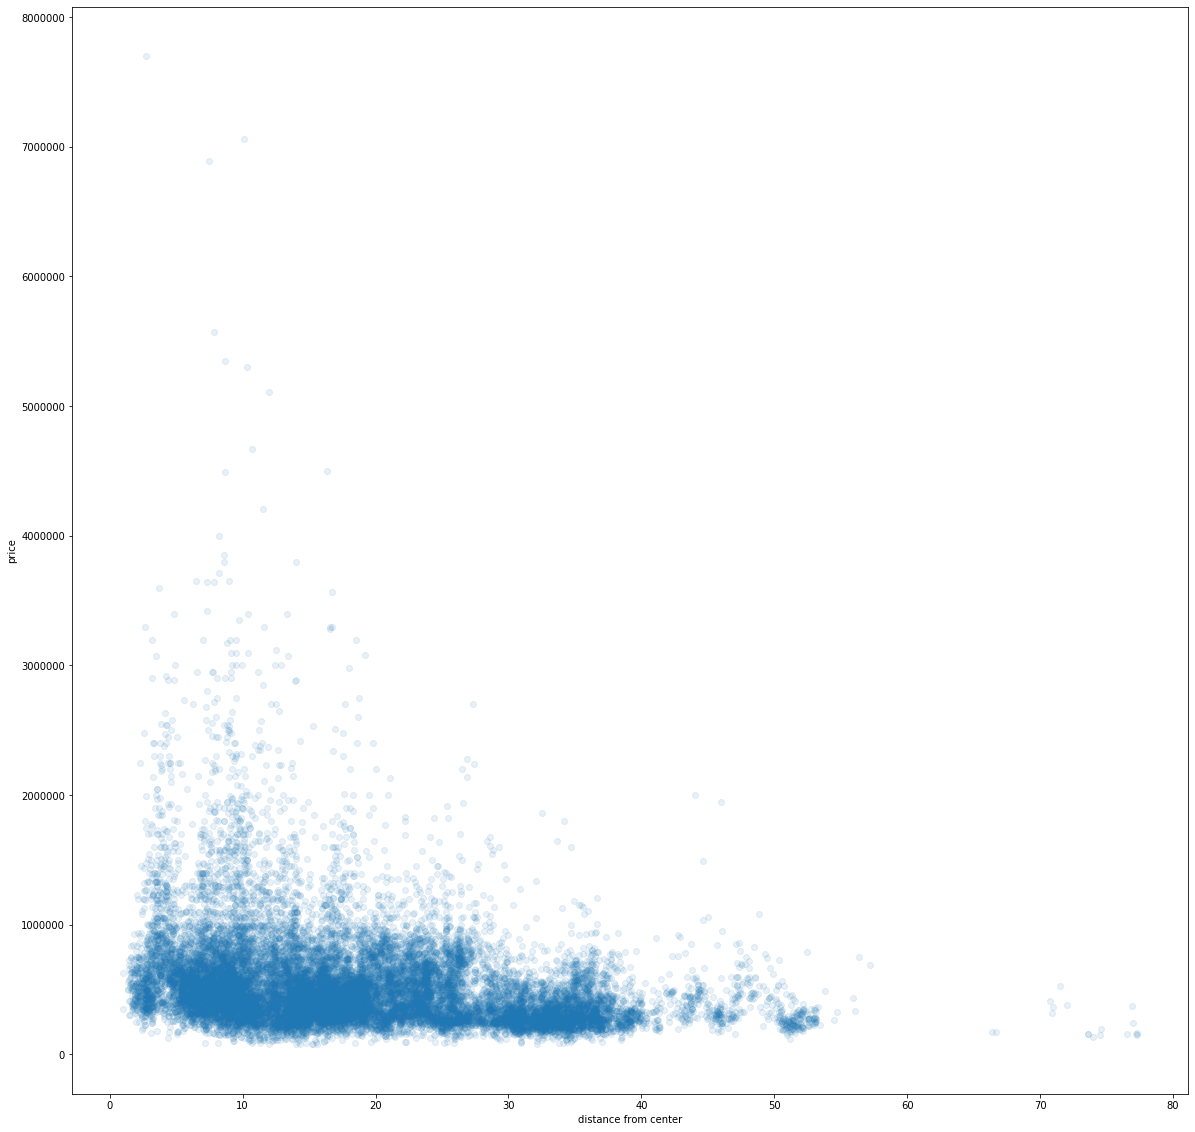

In [219]:
plt.figure(figsize = (20,20))
plt.scatter(y= data_filteredv5['price'], x = data_filteredv5['distance_from_center'], alpha = 0.1)
plt.ylabel('price')
plt.xlabel('distance from center')

In [123]:
amazon_latt = 47.3656
amazon_long = -122.2022

In [124]:
data_filteredv5['distance_from_amazon'] = 1
for item in data_filteredv5.index: 
    data_filteredv5['distance_from_amazon'][item] = \
    geodesic((amazon_latt,amazon_long),(data_filteredv5['lat'][item], data_filteredv5['long'][item])).km

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'distance from amazon')

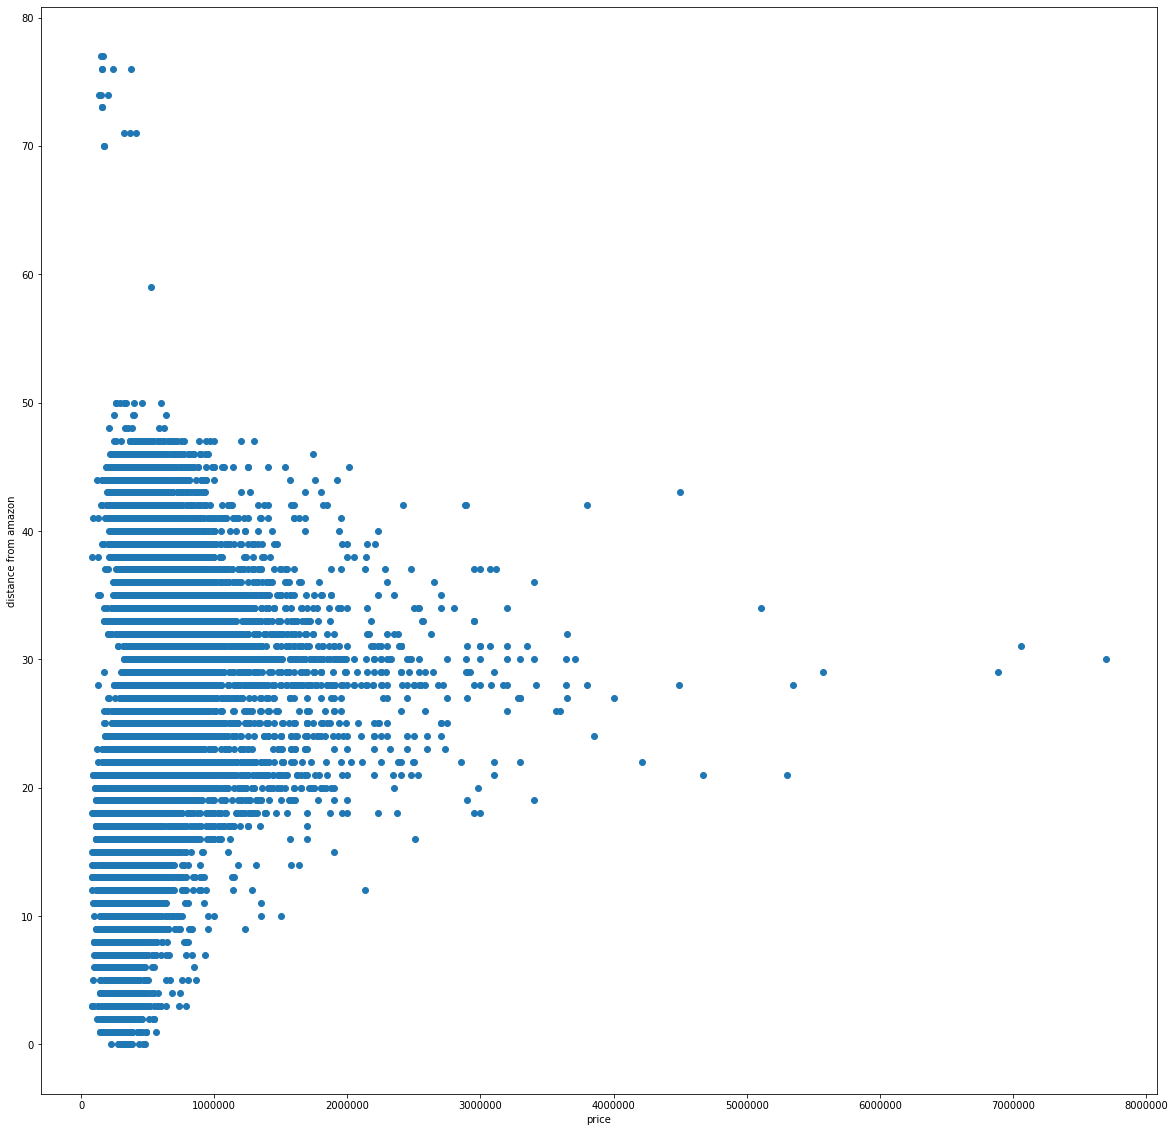

In [125]:
plt.figure(figsize = (20,20))
plt.scatter(data_filteredv5['price'], data_filteredv5['distance_from_amazon'])
plt.xlabel('price')
plt.ylabel('distance from amazon')